# Credit Card Fraud Detection 

**Project by: Mayur Rajput**

### Project Goal:

The goal of this project is to develop a machine learning model using Python for the purpose of accurately identifying fraudulent credit card transactions.

### Project Description :

The project aims to preprocess and normalize transaction data, address the class imbalance issue inherent in the dataset, and split the data into training and testing sets. Subsequently, a classification algorithm, such as logistic regression or random forests, will be trained to classify transactions as either fraudulent or genuine. The project will culminate in the evaluation of the model's performance using key metrics like precision, recall, and F1-score, and will consider techniques such as oversampling or undersampling to enhance the model's efficacy.

#### Here’s a step-by-step breakdown of what we’ll do :

**Data Collection:** Gather a comprehensive dataset, It contains only numerical input variables which are the result of a PCA transformation. Dataset is taken from Kaggle.  Load the provided credit card transaction dataset and understand its structure and characteristics.

**Data Preprocessing:** Clean and prepare the dataset to ensure data is in a suitable format for machine learning.
Data Cleaning: Check for missing values, outliers, or inconsistencies in the dataset.
Feature Scaling: Normalize the 'Amount' and 'Time' features.
Split Data: Divide the dataset into features (X) and the target variable (y).

**Handling Class Imbalance:** 
Detect class imbalance: Understand that fraudulent transactions are rare compared to genuine ones.
Apply Resampling Techniques: Use Random Oversampling to increase the number of fraudulent transactions or Random Undersampling to reduce genuine transactions.

**Model Selection and Training:** 
Choose Classification Algorithm: Select a suitable machine learning classification algorithm (e.g., Random Forest).
Train the Model: Use the resampled data to train the selected algorithm to classify transactions.

**Model Evaluation:** 
Evaluate Model Performance: Assess the model's performance using various metrics like accuracy, precision, recall, and F1-score.
Analyze Confusion Matrix: Understand the model's ability to correctly identify fraud and genuine transactions.


## 1 - Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 2 - Importing Dataset

In [3]:
data = pd.read_csv('creditcard.csv')

## 3 - Dataset Exploration

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
border: 1px solid black !important;
}
</style>

In [5]:
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 4 - Data Preprocessing

#### 4.1 - Data Cleaning

In [10]:
data.shape

(284807, 31)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(283726, 31)

#### 4.2 - Identifying Data Imbalance

In [13]:
sns.set_theme()

0    283253
1       473
Name: Class, dtype: int64


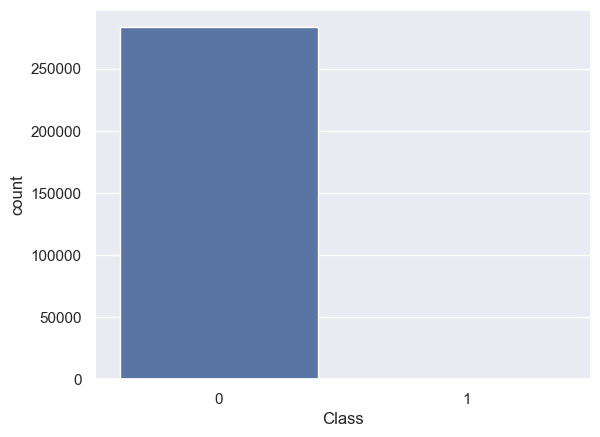

In [14]:
sns.countplot(x='Class', data=data)
print(data['Class'].value_counts())

0 -> Genuine Transaction

1 -> Fraud Transaction

From above countplot, it seems dataset is highly imbalanced.

#### 4.3 - Data Standardization

In [15]:
scaler = StandardScaler()

In [16]:
# Standardizing 'Time' and 'Amount' column
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


#### 4.4 - Split the data into Features (X) and the Target (y)

In [18]:
x = data.drop(['Class'], axis = 1)
y = data['Class']

In [19]:
print(x)

            Time         V1         V2        V3        V4        V5  \
0      -1.996823  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1      -1.996823   1.191857   0.266151  0.166480  0.448154  0.060018   
2      -1.996802  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3      -1.996802  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4      -1.996781  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  1.642235 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.642257  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.642278   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.642278  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.642362  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [20]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


#### 4.5 - Split the dataset into Training and Testing sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(283726, 30) (226980, 30) (56746, 30)


## 5. Handling Data Imbalanace

Since the dataset is highly imbalanced, we can apply resampling techniques to address this issue. Here, we'll use Random Oversampling to increase the number of fraudulent transactions.

In [22]:
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

In [23]:
x_resampled, y_resampled = oversampler.fit_resample(x_train, y_train)

In [24]:
print(x_resampled.shape, y_resampled.shape)

(339888, 30) (339888,)


## 6 - Building & Training Model

For this Classification task, we'll use machine learning models like Logstic Regression or Random Forest Classification.

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_resampled, y_resampled)

LogisticRegression()

## 7 - Model Evaluation

In [30]:
# Accuracy of training data
x_resampled_predictions = model.predict(x_resampled)

accuracy_score = accuracy_score(x_resampled_predictions, y_resampled)
print("Accuracy Score of training data:",accuracy_score)

Accuracy Score of training data: 0.9603869509956221
